<a href="https://colab.research.google.com/github/e-olang/Computer-Vision/blob/main/Mnist%20Gesture%20Recognition/training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/Gesture Recognition

In [ ]:
%ls

----

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
import cv2

In [2]:
train = pd.read_csv('sign_mnist_train.csv')
test = pd.read_csv('sign_mnist_test.csv')

In [3]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
labels = train['label'].values

In [5]:
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

<AxesSubplot: ylabel='count'>

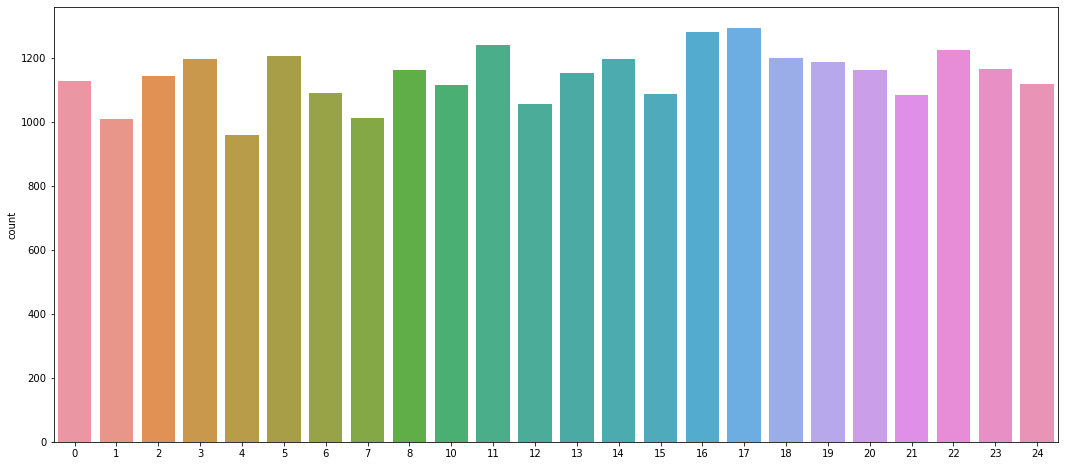

In [6]:
plt.figure(figsize = (18, 8))
sns.countplot(x = labels)

In [7]:
train.drop('label', axis = 1, inplace = True)

In [8]:
images = train.values
images = np.array([np.reshape(i, (28,28)) for i in images])
images = np.array([i.flatten() for i in images])

In [9]:
# one hot encode labels

from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [10]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


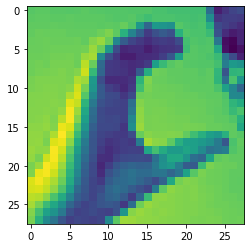

In [11]:
# Inspect an image at an index position

index = 2
print(labels[index])
plt.imshow(images[index].reshape(28, 28))

In [ ]:
import cv2
import numpy as np

for i in range(0, 10):
    rand = np.random.randint(0, len(images))
    input_im = images[rand]

    sample = input_im.reshape(28, 28).astype(np.uint8)
    sample = cv2.resize(sample, None, fx = 10, fy = 10, interpolation = cv2.INTER_CUBIC)
    cv2.imshow("Sample Image", sample)
    cv2.waitKey(0)

cv2.destroyAllWindows()

In [12]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(images, labels, test_size = 0.3, random_state = 101)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout


batch_size = 128
num_classes = 24
epochs = 10

In [14]:
#scale images
xtrain = xtrain / 255
xtest = xtest / 255

In [15]:
xtrain = xtrain.reshape(xtrain.shape[0], 28, 28, 1)
xtest = xtest.reshape(xtest.shape[0], 28, 28, 1)

# the above reshapes into size required by TF and Keras

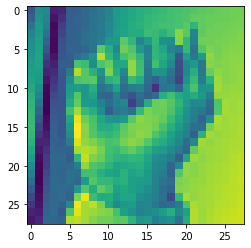

In [16]:
plt.imshow(xtrain[0].reshape(28, 28))

In [17]:
# creating a CNN model

from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as k
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes, activation = 'softmax'))

In [18]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(),
              metrics = ['accuracy'])

In [19]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

In [20]:
history = model.fit(xtrain, ytrain, 
                    validation_data=(xtest, ytest), 
                    epochs = epochs, 
                    batch_size = batch_size)

Epoch 1/10
151/151 [==============================] - 9s 55ms/step - loss: 2.6792 - accuracy: 0.1789 - val_loss: 1.7179 - val_accuracy: 0.4703
Epoch 2/10
151/151 [==============================] - 8s 53ms/step - loss: 1.3505 - accuracy: 0.5538 - val_loss: 0.8832 - val_accuracy: 0.7057
Epoch 3/10
151/151 [==============================] - 8s 53ms/step - loss: 0.8051 - accuracy: 0.7218 - val_loss: 0.5340 - val_accuracy: 0.8225
Epoch 4/10
151/151 [==============================] - 8s 55ms/step - loss: 0.5380 - accuracy: 0.8173 - val_loss: 0.3321 - val_accuracy: 0.8984
Epoch 5/10
151/151 [==============================] - 9s 60ms/step - loss: 0.3666 - accuracy: 0.8740 - val_loss: 0.2126 - val_accuracy: 0.9370
Epoch 6/10
151/151 [==============================] - 9s 59ms/step - loss: 0.2574 - accuracy: 0.9137 - val_loss: 0.1391 - val_accuracy: 0.9633
Epoch 7/10
151/151 [==============================] - 8s 56ms/step - loss: 0.1900 - accuracy: 0.9377 - val_loss: 0.1371 - val_accuracy: 0.9536

In [21]:
model.save('sign_lang_10_epochs.h5')

In [23]:
imp_model = tensorflow.keras.models.load_model('sign_lang_10_epochs.h5')

In [24]:
# get history from saved model

imp_hist = imp_model.history

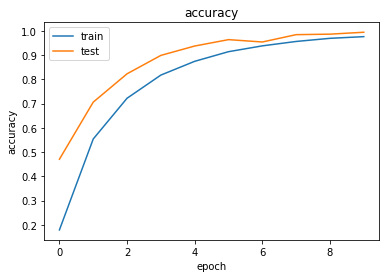

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])

plt.show()

In [25]:
test_labels = test['label']
test.drop('label', axis = 1, inplace = True)

test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

In [26]:
test_labels = lb.fit_transform(test_labels)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
ypred = imp_model.predict(test_images)

225/225 [==============================] - 3s 12ms/step


In [27]:
from sklearn.metrics import accuracy_score

print(accuracy_score(test_labels, ypred.round()))

0.7809537088678193


----